# STA130 Homework 04

### 1-\ The "Pre-lecture" video (above) mentioned the "standard error of the mean" as being the "standard deviation" of the distribution bootstrapped means. What is the difference between the "standard error of the mean" and the "standard deviation" of the original data? What distinct ideas do each of these capture? Explain this concisely in your own words.

- standard error of the mean (SED): is referred to as the difference between the sample means across many hypothetical samples in the bootstrapping model. In the sense it is giving us the likely variation for the mean in all the different datasets. which is a key difference between the two.

- standard deviation (SD): On the other hand standard deviation is the range of variation for a set of individual data variables. Unlike an 'SED' this is a variation of variables in a data set which tells us the variation the specific data has.

- Conclusion: key difference between an SD and an SED is that an SD is mean to indecate the variation for individual data in a data set, while SEM will focus on the variability of the mean across different samples of data sets through the process of bootstrapping.

[chatbot log](https://chatgpt.com/share/66fa10e9-5b74-8006-befb-3505a2eae81f)

### 2-\ The "Pre-lecture" video (above) suggested that the "standard error of the mean" could be used to create a confidence interval, but didn't describe exactly how to do this. How can we use the "standard error of the mean" to create a 95% confidence interval which "covers 95% of the bootstrapped sample means"? Explain this concisely in your own words.

- standard error of the mean: when referring to this concept, we are talking about a similar concept to range for outlier data. 95% is meant to cover where the SED will most likely lie between if the bootstrapping method is repeated. We can almost think of it as a margin for error in physics. to calculate it we: CI=Sample Mean±(1.96×Standard Error of the Mean). any values lying in this range will be considered a very plausible result for the mean occuring to be for the set means.

### 3-\ Creating the "sample mean plus and minus about 2 times the standard error" confidence interval addressed in the previous problem should indeed cover approximately 95% of the bootstrapped sample means. Alternatively, how do we create a 95% bootstrapped confidence interval using the bootstrapped means (without using their standard deviation to estimate the standard error of the mean)? Explain this concisely in your own words.

- To create the 95% confidence interavl we have to generate the Bootstarpped means, sort the means in ascending order (lower to higher). Than find the 2.5% and 97.5% should be sorted, the means between the lower and upper bounds is the 95% confidence interval. The point of the 95% confidence interval is that it doesnt use any formula to calculate, providing a flexible and robust approach for estimating confidence intervals.

### 4-\ The "Pre-lecture" video (above) mentioned that bootstrap confidence intervals could apply to other statistics of the sample, such as the "median". Work with a ChatBot to create code to produce a 95% bootstrap confidence interval for a population mean based on a sample that you have and comment the code to demonstrate how the code can be changed to produce a 95% bootstrap confidence interval for different population parameter (other than the population mean, such as the population median).

In [1]:
import numpy as np

# Step 1: Generate a population data (normally distributed) and take a sample
np.random.seed(42)  # Setting seed for reproducibility
population_data = np.random.normal(loc=100, scale=15, size=1000)  # Population with mean 100 and std dev 15
sample_data = np.random.choice(population_data, size=30, replace=False)  # Random sample of 30 from the population

# Step 2: Define the bootstrap confidence interval function
def bootstrap_confidence_interval(data, num_bootstrap_samples=10000, statistic=np.mean, ci_percentile=95):
    # Generate bootstrap samples by sampling with replacement from the original data
    bootstrapped_samples = np.random.choice(data, size=(num_bootstrap_samples, len(data)), replace=True)
    
    # Calculate the statistic (mean, median, etc.) for each bootstrap sample
    bootstrapped_statistics = np.apply_along_axis(statistic, axis=1, arr=bootstrapped_samples)
    
    # Calculate the lower and upper percentiles for the confidence interval
    lower_bound = np.percentile(bootstrapped_statistics, (100 - ci_percentile) / 2)
    upper_bound = np.percentile(bootstrapped_statistics, 100 - (100 - ci_percentile) / 2)
    
    return lower_bound, upper_bound

# Step 3: Calculate 95% confidence interval for the population mean
mean_confidence_interval = bootstrap_confidence_interval(sample_data, statistic=np.mean)

# Step 4: Calculate 95% confidence interval for the population median
median_confidence_interval = bootstrap_confidence_interval(sample_data, statistic=np.median)

# Step 5: Output both results
print(f"95% Confidence Interval for the Mean: {mean_confidence_interval}")
print(f"95% Confidence Interval for the Median: {median_confidence_interval}")


95% Confidence Interval for the Mean: (97.37707515479217, 109.42400153785402)
95% Confidence Interval for the Median: (93.01530426002742, 109.48275908501564)


[Chatlog](https://chatgpt.com/share/66fa10e9-5b74-8006-befb-3505a2eae81f)

### 5. The previous question addresses making a confidence interval for a population parameter based on a sample statistic. Why do we need to distinguish between the role of the popualation parameter and the sample sample statistic when it comes to confidence intervals? Explain this concisely in your own words.

- We need to distinguish between the two bcs they are different in their nature. A population's parameters are a fixed unknown value, a value that describes the whole population. On the other hand a sample statistic is a known value , though the sample values from each sample taken from the population. So to sum it up, a  population parameter is always constant, though for a sample it will vary based on the parameters of the sample from the population.

[Chatlog](https://chatgpt.com/share/66fa10e9-5b74-8006-befb-3505a2eae81f)

### 6. Provide written answers explaining the answers to the following questions in an informal manner of a conversation with a friend with little experience with statistics.

1.What is the process of bootstrapping?
- draw out a sample size save of data, the same save as the original dataset. Randomly drawing samples, allowing for replacement(picking a sample more than once).
- calculate/compute the mean, median, standard deviation, etc.
- collect all the data to create the sampling distribution.
- hind the confidence interval to find the uncertainty in your estimate based on the observed sample.

2.What is the main purpose of bootstrapping?
- to assess the confidence interval for a sample of data.
- to assess the variability of the sample based on the many mock samples.
- offer a hypothetical assessment of a data sample, if it were assessed on many occasions.
- Lastly used a method to estimate the median, percentiles, and other non-standard measures.

3.If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?
- We can take the sample and run a boot sample method on it. then we get the 95% confidence interval. we can assess whether the likely hood of the population is a plausible amount or not. if it lies out of this range we can confidently state that the average is very unlikely.

[Chatlog](https://chatgpt.com/share/66fd8b19-97fc-8006-ba90-47c0cc024bbb)

### 7-\ The "Pre-lecture" video (above) introduced hypothesis testing by saying that "the confidence interval covers zero, so we cannot reject the hypothesis that the drug is [on average] not doing anything". This conclusion could be referred to as "failing to reject the null hypothesis", where the term "null" refers to the concept of "no effect [on average]". Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero? Alternatively, what would lead to the opposite conclusion in this context; namely, instead choosing "to reject the null hypothesis"? Explain the answers to these questions concisely in your own words.

- The reason the null hypothesis can’t be rejected is the fact that the standard error deviation overlaps the 0 median. hence there is a plausible chance that the median can lie on the mark where the drug is null. If we want the null hypothesis to not be true we need the standard deviation range not to include the null mark in the graph. Hence there is no chance that the median of the bootstrapping will lie on the null mark for all the samples.

### 8. Complete the following assignment.

##### Problem Introduction:
- We are analyzing the change in patients' health after taking a vaccine. We are meant to compare their initial and final health results, to ensure that the vaccine is useful or not. In this case we will refer to the vaccine being null or not. We will come to a conclusion from running a bootstrapping method on the data (change in health grade), next we will get the mean for all those different samples, then graph them to find the mean difference between all the different bootstrap samples. We finally then find the 95% confidence interval, where 95% of all means lie between. if the change of 0 is in that interval we will not reject the null hypothesis, if not then we reject it.

##### An explaination of the meaning of a Null Hypothesis of "no effect" in this context
- The Null hypothesis in this case is referring to the chance that patients who happened to take the vaccine experienced no direct improvement after they took it. Hence there is a chance where the vaccine was of no use. We say chance because with bootstrapping we are making probable samples of data where there is a high plausibility for the statistics provided being reflective of the true population data that we couldn't get(referring to if more patients had taken the vaccine).

##### Data Visualization (motivating and illustrating the comparison of interest)

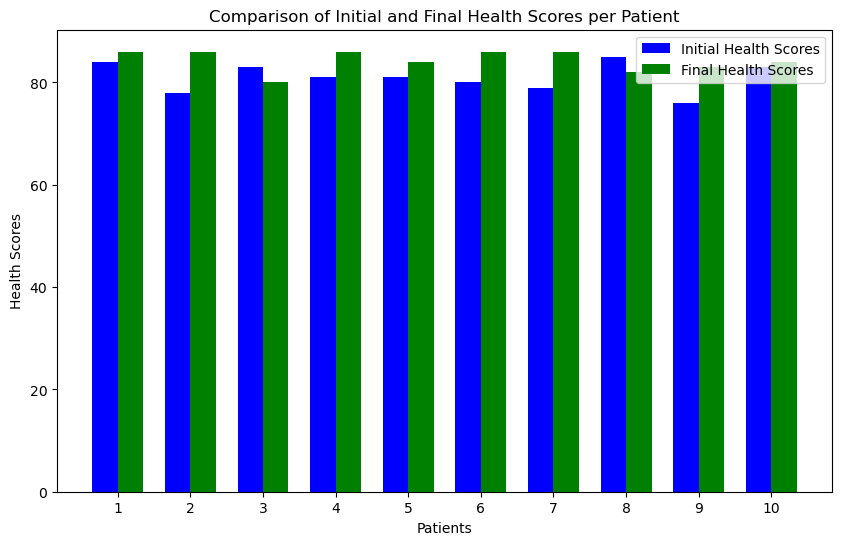

In [18]:
import numpy as np
import matplotlib.pyplot as plx

# Data
initial_health_scores = np.array([84, 78, 83, 81, 81, 80, 79, 85, 76, 83])
final_health_scores = np.array([86, 86, 80, 86, 84, 86, 86, 82, 83, 84])

# X axis for patients (1 to 10)
patients = np.arange(1, 11)

# Plotting histogram with bars for each patient
bar_width = 0.35  # Width of the bars

# Create the figure
plx.figure(figsize=(10, 6))

# Initial health scores
plx.bar(patients - bar_width/2, initial_health_scores, bar_width, color='blue', label='Initial Health Scores')

# Final health scores
plx.bar(patients + bar_width/2, final_health_scores, bar_width, color='green', label='Final Health Scores')

# Adding labels, title, and legend
plx.title('Comparison of Initial and Final Health Scores per Patient')
plx.xlabel('Patients')
plx.ylabel('Health Scores')
plx.xticks(patients)  # Ensures patient numbers are shown on the x-axis
plx.legend()

# Show plot
plx.show()

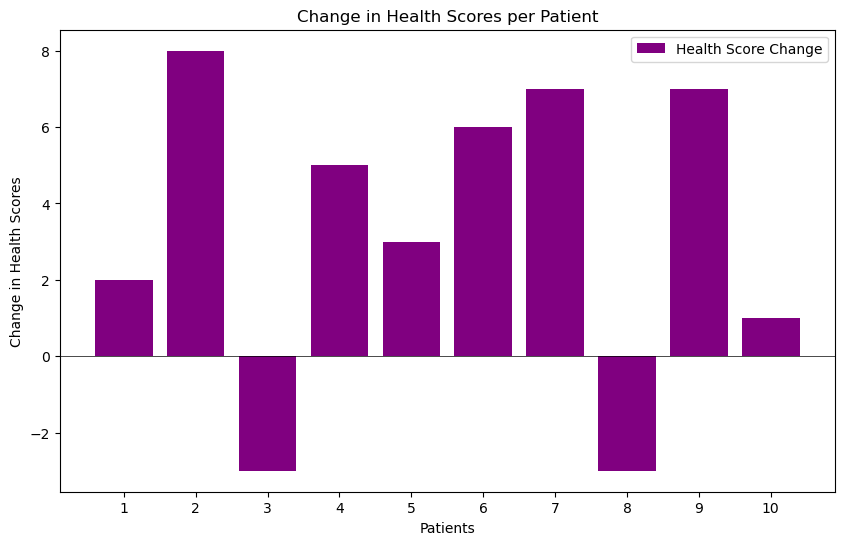

In [17]:
import numpy as np
import matplotlib.pyplot as plc

# Data
initial_health_scores = np.array([84, 78, 83, 81, 81, 80, 79, 85, 76, 83])
final_health_scores = np.array([86, 86, 80, 86, 84, 86, 86, 82, 83, 84])

# Calculate the change in health scores for each patient
health_score_change = final_health_scores - initial_health_scores

# X axis for patients (1 to 10)
patients = np.arange(1, 11)

# Plotting histogram with the change in health scores per patient
plc.figure(figsize=(10, 6))

# Bar plot for the change in health scores
plc.bar(patients, health_score_change, color='purple', label='Health Score Change')

# Adding labels, title, and legend
plc.title('Change in Health Scores per Patient')
plc.xlabel('Patients')
plc.ylabel('Change in Health Scores')
plc.xticks(patients)  # Ensures patient numbers are shown on the x-axis
plc.axhline(0, color='black',linewidth=0.5)  # Adds a horizontal line at 0 for reference
plc.legend()

# Show plot
plc.show()

Observed mean difference: 3.299999999999997
95% Confidence Interval: [1.2974999999999974, 5.400000000000006]
p-value: 0.521
Fail to reject the null hypothesis: There is no significant effect of the vaccine.


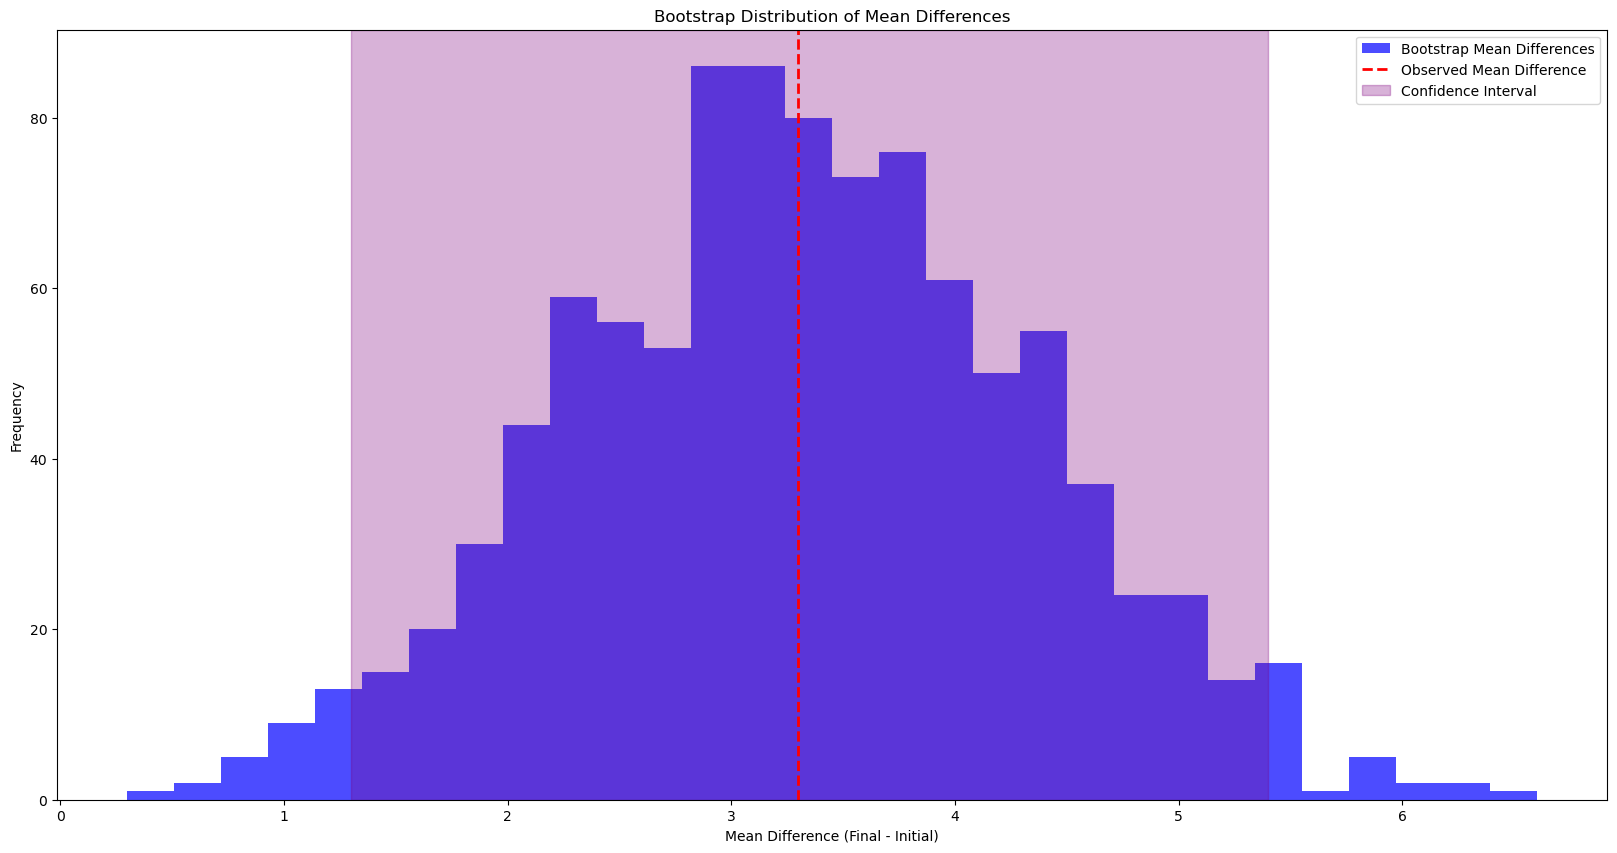

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Data for Initial and Final Health Scores
initial_health_scores = np.array([84, 78, 83, 81, 81, 80, 79, 85, 76, 83])
final_health_scores = np.array([86, 86, 80, 86, 84, 86, 86, 82, 83, 84])

# Number of bootstrap iterations
n_iterations = 1000
np.random.seed(42)  # For reproducibility

# Function to calculate the mean difference between initial and final health scores
def mean_difference(sample_initial, sample_final):
    return np.mean(sample_final) - np.mean(sample_initial)

# Observed mean difference in the actual data
observed_mean_diff = mean_difference(initial_health_scores, final_health_scores)

# Bootstrap process
bootstrap_diffs = []
for _ in range(n_iterations):
    # Resample with replacement from the original data
    bootstrap_initial = np.random.choice(initial_health_scores, size=len(initial_health_scores), replace=True)
    bootstrap_final = np.random.choice(final_health_scores, size=len(final_health_scores), replace=True)
    
    # Calculate the mean difference for the resampled data
    bootstrap_diffs.append(mean_difference(bootstrap_initial, bootstrap_final))

# Convert the bootstrap differences to a numpy array
bootstrap_diffs = np.array(bootstrap_diffs)

# Calculate the 95% confidence interval
lower_bound = np.percentile(bootstrap_diffs, 2.5)
upper_bound = np.percentile(bootstrap_diffs, 97.5)

# p-value calculation: proportion of bootstrap samples where the mean difference is >= observed difference
p_value = np.mean(bootstrap_diffs >= observed_mean_diff)

# Output the results
print(f"Observed mean difference: {observed_mean_diff}")
print(f"95% Confidence Interval: [{lower_bound}, {upper_bound}]")
print(f"p-value: {p_value}")

# Conclusion: Reject or fail to reject the null hypothesis
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant effect of the vaccine.")
else:
    print("Fail to reject the null hypothesis: There is no significant effect of the vaccine.")

# Adding histograms to visualize the bootstrap distribution
plt.figure(figsize=(20, 10))
plt.hist(bootstrap_diffs, bins=30, alpha=0.7, color='b', label='Bootstrap Mean Differences')

# Plot the observed mean difference
plt.axvline(observed_mean_diff, color='r', linestyle='dashed', linewidth=2, label='Observed Mean Difference')
plt.axvspan(lower_bound, upper_bound, color='purple', alpha=0.3, label='Confidence Interval')

# Adding titles and labels
plt.title('Bootstrap Distribution of Mean Differences')
plt.xlabel('Mean Difference (Final - Initial)')
plt.ylabel('Frequency')
plt.legend()

# Display the plot
plt.show()


##### Quantitative Analysis
- In the latest code we visualized the distribution of the means for all the bootstrap samples that we processed. Then we see how in the code we started to calculate the different statistics that we need to determine if the hypothesis is null or not. In our case we use two methods. The first is to solve for the inner and outer bounds of the 95% confidence interval for our set of means. this is done used the code under '# Calculate the 95% confidence interval'. if the lower bound is greater than 0 we can come to the conclusion that we can reject the chance of the null hypothesis to be true. Through the use of the chatBot I came to the understanding that there is even a better method to check if it's plausible to check if the null hypothesis is true. This method is through the use of the p-value. Through the use of this code'p_value = np.mean(bootstrap_diffs >= observed_mean_diff)' we get the p value. In our case the p-value is 0.521, hence greater than 0.05, if so then we can conclude that the sample data might have been just luck and there we cant exclude the possibility of the set being null.

##### Findings and Discussion
- what I can conclude is that there is a possibility that the null hypothesis can be true in our case, though to be fairly honest the sample we have might as well be too small to really come to a conclusion. To further complicate our dilemma we are dealing with patients at different ages and genders, leaving us with a very broad overview of what the vaccines true effects are. These samples of data which seem to lack in terms of data entered can be easily manipulated to sway a statistic in one's favor. So me discovering the use for the p-value was quite more helpful than just using the 95% confidence interval. So no matter how many iterations we may run we simply are pulling out data from a sample which, to put it in a fair light, is quite inefficient to make the grand hypothesis of determining if the vaccine is null or not.

[Chatbot log 1](https://chatgpt.com/share/66ff58c1-9f80-8006-8607-55e51a162532)
[Chatbot log 2](https://chatgpt.com/share/66fd8b19-97fc-8006-ba90-47c0cc024bbb)

### 9-\Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

- I believe with this weeks work I am a bit confused even after doing what was stated above i might pay a visity to the office hours. Though overall Its not too bad.